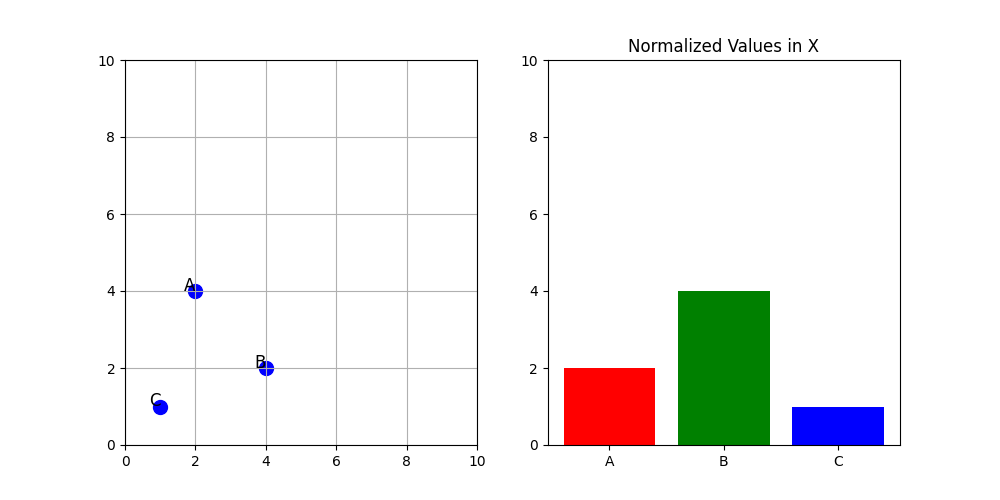

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, VBox, HBox, Output

%matplotlib widget

# Initial positions of points
initial_positions = np.array([[2, 4], [4, 2], [1, 1]])
labels = ['A', 'B', 'C']  # Labels for each point

# Set up the matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Scatter plot on the first axes
points = ax1.scatter(initial_positions[:, 0], initial_positions[:, 1], s=100, c='blue')
texts = [ax1.text(pos[0], pos[1], label, fontsize=12, ha='right') for pos, label in zip(initial_positions, labels)]
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.grid(True)

# Bar plot on the second axes
bars = ax2.bar(labels, initial_positions[:, 0], color=['red', 'green', 'blue'])
ax2.set_ylim(0, 10)
ax2.set_title('Normalized Values in X')

# Creating sliders for each coordinate
sliders = []
for i, (x_init, y_init) in enumerate(initial_positions):
    x_slider = FloatSlider(value=x_init, min=0, max=10, step=.5, description=f'X{i+1}:', continuous_update=False, readout=True, style={'description_width': 'initial'})
    y_slider = FloatSlider(value=y_init, min=0, max=10, step=0.5, description=f'Y{i+1}:', continuous_update=False, readout=True, style={'description_width': 'initial'})
    sliders.append((x_slider, y_slider))

# Weight slider
weight_slider = FloatSlider(value=1.0, min=0.1, max=2.0, description='Weight:', continuous_update=False, readout=True, style={'description_width': 'initial'})

# Function to update the scatter plot and normalized values
def update_plot(*args):
    new_positions = np.array([[x.value, y.value] for x, y in sliders])
    points.set_offsets(new_positions)
    for text, (x, y) in zip(texts, new_positions):
        text.set_position((x, y))
    fig.canvas.draw_idle()
    update_normalized_values(new_positions)

def update_normalized_values(positions):
    weight = weight_slider.value
    normalized_values = positions / (positions.sum(axis=0) * weight)
    sum_values = normalized_values.sum(axis=1)
    
    # Building detailed output string
    detail_output = "<b>Individual Normalized Values:</b><br>"
    for label, norm_vals in zip(labels, normalized_values):
        detail_output += f"{label}: {norm_vals.round(2).tolist()}<br>"
    detail_output += f"<b>Sum of Normalized Values:</b> {sum_values.round(2).tolist()}"
    
    display_area.value = detail_output
    
    # Update the bar plot for normalized values in X
    for bar, new_value in zip(bars, sum_values[:]):
        bar.set_height(new_value)
    ax2.set_ylim(0, np.max(sum_values[:])*1.1)  # Adjust the y-axis limit dynamically
    ax2.figure.canvas.draw_idle()


# Attach update function to sliders
for x_slider, y_slider in sliders:
    x_slider.observe(update_plot, 'value')
    y_slider.observe(update_plot, 'value')

weight_slider.observe(update_plot, 'value')

# Area to display normalized values
display_area = Output()


# Organize sliders and plot in layout
slider_boxes = [VBox([x, y]) for x, y in sliders]
ui = VBox([HBox(slider_boxes), weight_slider, display_area])
display(ui)

